## Importing necessary libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## I am using the below xlsx file which has the neighbourhood co-ordinates of Bangalore city

In [5]:
ban_data = pd.read_excel("E:\\coursera\\bangTest.xlsx")

In [6]:
ban_data.head()

,Neigbourhood,Pincode,Zone,long,lat
0,Mahatma Gandhi Road S.O,560001,Bangalore East,77.6100,12.9739
1,Malleswaram S.O,560003,Bangalore West,77.5709,13.0002
2,Basavanagudi H.O,560004,Bangalore South,77.5741,12.9446
3,Fraser Town S.O,560005,Bangalore East,77.6164,13.0005
4,H.A.L II Stage H.O,560008,Bangalore East,77.6427,12.9686


In [7]:
ban_data.shape

(42, 5)

## Adding co-oridinates of key location missing.

In [7]:
ban_data = ban_data.append({'Neigbourhood':'Whitefield','Pincode':'560066','Zone':'Bangalore East','long':77.7500,'lat':12.9698},ignore_index=True)

In [8]:
ban_data = ban_data.append({'Neigbourhood':'Sarjapur','Pincode':'562125','Zone':'Bangalore East','long':77.7864,'lat':12.8576},ignore_index=True)

In [9]:
ban_data = ban_data.append({'Neigbourhood':'HSR','Pincode':'562125','Zone':'Bangalore East','long':77.6446,'lat':12.9121},ignore_index=True)

In [10]:
ban_data.shape

(45, 5)

## Getting bangalore city co-ordinates

In [4]:
address = 'Bangalore'
geolocator = Nominatim(user_agent="bangalore_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore are 12.9791198, 77.5912997.


In [11]:
ban_data.columns

Index(['Neigbourhood', 'Pincode', 'Zone', 'long', 'lat'], dtype='object')

In [11]:
# create map of New York using latitude and longitude values
map_bangalore = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(ban_data['lat'], ban_data['long'], ban_data['Neigbourhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

## Using FourSquare API credentails to get venue details

In [12]:
CLIENT_ID = 'FIXQ03CBSPLWOMCLTZICAUT2GUD0KPXM351Y4OVMPDRG3KUZ' # your Foursquare ID
CLIENT_SECRET = 'YXE4UX4UUBYBATIXVX1SUQAC4PVNX30HRNBY4MQ1ONKCNMBZ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
radius=3000
LIMIT=100

In [15]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

## Get nearby veneus in 3000 meter radius around these neighborhood.

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=3000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
# type your answer here

bangolore_venues = getNearbyVenues(names=ban_data['Neigbourhood'],
                                   latitudes=ban_data['lat'],
                                   longitudes=ban_data['long']
                                  )



Mahatma Gandhi Road S.O
Malleswaram S.O
Basavanagudi H.O
Fraser Town S.O
H.A.L II Stage H.O
Rajajinagar H.O
Jayangar III Block S.O
Jalahalli H.O
Jalahalli East S.O
Vimanapura S.O
Gayathrinagar S.O
Yeswanthpura S.O
Dharmaram College S.O
St. John's Medical College S.O
Carmelram S.O
Marathahalli Colony S.O
Jayanagar H.O
Arabic College S.O
Ashoknagar S.O (Bangalore)
Mathikere S.O
Malleswaram West S.O
Yelahanka S.O
G.K.V.K. S.O
Bommanahalli S.O (Bangalore)
B Sk II Stage S.O
Padmanabhnagar S.O
Domlur S.O
Jeevanbhimanagar S.O
Bannerghatta Road S.O
Kothanur S.O
J P Nagar S.O
Sadashivanagar S.O
Chandapura S.O
Gottigere S.O
Mahalakshmipuram Layout S.O
Sahakaranagar P.O S.O
Koramangala VI Bk S.O
Vidyaranyapura S.O
Bommasandra Industrial Estate S.O
Electronics City S.O
HSR Layout S.O
Bellandur S.O
Whitefield
Sarjapur
HSR


In [23]:
bangolore_venues.rename(columns={'Venue Category':'Venue_Category'}, 
                 inplace=True)

In [113]:
bangolore_venues.shape

(1533, 7)

## Some venues might be repeated due to proximity, So consider unique ones using long,lat combination

In [26]:
bangolore_venues.drop_duplicates(subset=['Venue Latitude','Venue Longitude'],inplace=True)

In [114]:
bangolore_venues.shape

(1533, 7)

## Lets filter to indlude data related food and drinking places like bars, cafe,pubs,brewery,restaurants etc..

In [44]:
bangolore_venues_bars = bangolore_venues[bangolore_venues['Venue_Category'].str.contains("Bar") & ~bangolore_venues['Venue_Category'].str.contains("Juice")]

In [216]:
bangalore_venues_filtered = pd.DataFrame()

In [217]:
bangalore_venues_filtered = pd.concat([bangalore_venues_filtered,bangolore_venues_bars],ignore_index=True)

In [218]:
bangalore_venues_filtered.shape

(37, 7)

In [219]:
bangalore_venues_filtered.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,Mahatma Gandhi Road S.O,12.9739,77.6100,Toast and Tonic,12.966741,77.608733,Cocktail Bar
1,Mahatma Gandhi Road S.O,12.9739,77.6100,Margarita Lounge Bar,12.970741,77.597553,Cocktail Bar
2,Mahatma Gandhi Road S.O,12.9739,77.6100,i-BAR,12.973823,77.619328,Hotel Bar
3,Mahatma Gandhi Road S.O,12.9739,77.6100,Ice Bar,12.973554,77.619959,Bar
4,Malleswaram S.O,13.0002,77.5709,The Blue Bar,12.984872,77.583973,Hotel Bar


In [220]:
bangolore_venues_cafes = bangolore_venues[bangolore_venues['Venue_Category'].str.contains("Cafe") | bangolore_venues['Venue_Category'].str.contains("Coffee")]

In [221]:
bangalore_venues_filtered = pd.concat([bangalore_venues_filtered,bangolore_venues_cafes],ignore_index=True)

In [222]:
bangalore_venues_filtered.shape

(91, 7)

In [223]:
bangolore_venues_restaurant = bangolore_venues[bangolore_venues['Venue_Category'].str.contains("Restaurant")]

In [224]:
bangalore_venues_filtered = pd.concat([bangalore_venues_filtered,bangolore_venues_restaurant],ignore_index=True)

In [225]:
bangalore_venues_filtered.shape

(663, 7)

In [226]:
bangolore_venues_pubs = bangolore_venues[bangolore_venues['Venue_Category'].str.contains("Pub")]

In [227]:
bangalore_venues_filtered = pd.concat([bangalore_venues_filtered,bangolore_venues_pubs],ignore_index=True)

In [228]:
bangalore_venues_filtered.shape

(683, 7)

In [229]:
bangolore_venues_shopping = bangolore_venues[bangolore_venues['Venue_Category'].str.contains("Shopping")]

In [230]:
bangalore_venues_filtered = pd.concat([bangalore_venues_filtered,bangolore_venues_shopping],ignore_index=True)

In [231]:
bangolore_venues_brews = bangolore_venues[bangolore_venues['Venue_Category'].str.contains("Brewery")]

In [232]:
bangalore_venues_filtered = pd.concat([bangalore_venues_filtered,bangolore_venues_brews],ignore_index=True)

In [233]:
bangolore_venues_lounges = bangolore_venues[bangolore_venues['Venue_Category'].isin(['Lounge','Nightclub'])]

In [234]:
bangalore_venues_filtered = pd.concat([bangalore_venues_filtered,bangolore_venues_lounges],ignore_index=True)

In [236]:
bangalore_venues_filtered.shape

(748, 7)

## one-hot encoding to convert categorical to numerical values

In [237]:
# one hot encoding
bangolore_venues_onehot = pd.get_dummies(bangalore_venues_filtered[['Venue_Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangolore_venues_onehot['Neighborhood'] = bangalore_venues_filtered['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bangolore_venues_onehot.columns[-1]] + list(bangolore_venues_onehot.columns[:-1])
fixed_columns
bangolore_venues_onehot = bangolore_venues_onehot[fixed_columns]

bangolore_venues_onehot.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,Australian Restaurant,Bar,Bengali Restaurant,Brewery,Cafeteria,Chettinad Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Dim Sum Restaurant,Dive Bar,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gaming Cafe,German Restaurant,Halal Restaurant,Hookah Bar,Hotel Bar,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lounge,Maharashtrian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Multicuisine Indian Restaurant,Nightclub,North Indian Restaurant,Pakistani Restaurant,Pub,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Salon / Barbershop,Seafood Restaurant,Shopping Mall,South Indian Restaurant,Sports Bar,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Mahatma Gandhi Road S.O,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Mahatma Gandhi Road S.O,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Mahatma Gandhi Road S.O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Mahatma Gandhi Road S.O,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Malleswaram S.O,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## calculating the mean of the number of venues

In [238]:
bangolore_venues_grouped = bangolore_venues_onehot.groupby('Neighborhood').mean().reset_index()
bangolore_venues_grouped

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,Australian Restaurant,Bar,Bengali Restaurant,Brewery,Cafeteria,Chettinad Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Dim Sum Restaurant,Dive Bar,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gaming Cafe,German Restaurant,Halal Restaurant,Hookah Bar,Hotel Bar,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lounge,Maharashtrian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Multicuisine Indian Restaurant,Nightclub,North Indian Restaurant,Pakistani Restaurant,Pub,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Salon / Barbershop,Seafood Restaurant,Shopping Mall,South Indian Restaurant,Sports Bar,Sushi Restaurant,Szechuan Restaurant,Thai Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arabic College S.O,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.000000,0.060606,0.00,0.000000,0.000000,0.030303,0.181818,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.030303,0.272727,0.000000,0.030303,0.000000,0.000000,0.000000,0.000000,0.090909,0.060606,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000,0.000000,0.030303,0.000000,0.030303,0.030303,0.030303,0.000000,0.000000,0.000000,0.000000,0.000000,0.030303,0.000000
1,Ashoknagar S.O (Bangalore),0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Bannerghatta Road S.O,0.000000,0.000000,0.040000,0.000000,0.00000,0.040000,0.040000,0.040000,0.000000,0.000000,0.040000,0.000000,0.080000,0.00,0.000000,0.040000,0.000000,0.040000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Basavanagudi H.O,0.000000,0.000000,0.000000,0.085714,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.057143,0.00,0.000000,0.000000,0.000000,0.114286,0.000000,0.000000,0.000000,0.00,0.028571,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,0.028571,0.057143,0.085714,0.000000,0.000000,0.000000,0.000000,0.000000,0.057143,0.000000
4,Bellandur S.O,0.000000,0.000000,0.090909,0.090909,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.272727,0.000000,0.090909,0.090909,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Bommanahalli S.O (Bangalore),0.000000,0.040000,0.000000,0.040000,0.00000,0.040000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,0.04,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,

## Lets find what is optimal K that can be used in K-means

In [32]:
import matplotlib.pyplot as plt  
from matplotlib import style 
from sklearn.cluster import KMeans


In [239]:
bangolore_venues_grouped_clustering = bangolore_venues_grouped.drop('Neighborhood', 1)

In [240]:
cost=[]
# set number of clusters
kclusters = 5
for i in range(1,11):
    
    # run k-means clustering
    kmeans = KMeans(n_clusters=i, random_state=0).fit(bangolore_venues_grouped_clustering)
    # check cluster labels generated for each row in the dataframe
    kmeans.labels_[0:10]
    cost.append(kmeans.inertia_)

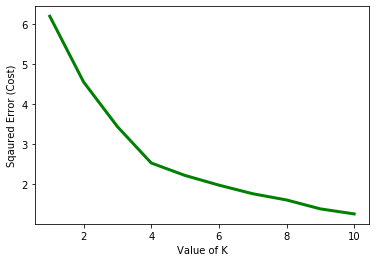

In [241]:
plt.plot(range(1, 11), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.show()

## From the above Elbow method we can optimal value of K is 4. We will use 5 clusters.

## Use the optimal value of k in K-means clustering 

In [259]:
# set number of clusters
kclusters = 5


# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bangolore_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([3, 4, 3, 3, 3, 3, 0, 3, 4, 4])

In [102]:
kmeans.labels_[0:10] 

array([3, 1, 4, 0, 5, 0, 4, 0, 3, 2])

In [99]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [260]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
bangalore_sorted = pd.DataFrame(columns=columns)
bangalore_sorted['Neighborhood'] = bangolore_venues_grouped['Neighborhood']

for ind in np.arange(bangolore_venues_grouped.shape[0]):
    bangalore_sorted.iloc[ind, 1:] = return_most_common_venues(bangolore_venues_grouped.iloc[ind, :], num_top_venues)

bangalore_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Arabic College S.O,Indian Restaurant,Fast Food Restaurant,Korean Restaurant,Lounge,Coffee Shop,Chinese Restaurant,Indian Chinese Restaurant,Italian Restaurant,Vegetarian / Vegan Restaurant,South Indian Restaurant
1,Ashoknagar S.O (Bangalore),Indian Restaurant,Coffee Shop,Vietnamese Restaurant,Dive Bar,Indian Chinese Restaurant,Hyderabadi Restaurant,Hotel Bar,Hookah Bar,Halal Restaurant,German Restaurant
2,Bannerghatta Road S.O,Indian Restaurant,Coffee Shop,South Indian Restaurant,Restaurant,Brewery,Middle Eastern Restaurant,Eastern European Restaurant,Lounge,Chinese Restaurant,Fast Food Restaurant
3,Basavanagudi H.O,Indian Restaurant,Fast Food Restaurant,Asian Restaurant,South Indian Restaurant,Coffee Shop,Vegetarian / Vegan Restaurant,Shopping Mall,Restaurant,Chinese Restaurant,Mexican Restaurant
4,Bellandur S.O,Indian Restaurant,Japanese Restaurant,Seafood Restaurant,Lounge,Mexican Restaurant,Fast Food Restaurant,Italian Restaurant,Asian Restaurant,Andhra Restaurant,Brewery
5,Bommanahalli S.O (Bangalore),Indian Restaurant,Fast Food Restaurant,Hotel Bar,Pub,Punjabi Restaurant,Chinese Restaurant,Halal Restaurant,Middle Eastern Restaurant,Dim Sum Restaurant,Hyderabadi Restaurant
6,Bommasandra Industrial Estate S.O,Fast Food Restaurant,Vietnamese Restaurant,Dive Bar,Indian Restaurant,Indian Chinese Restaurant,Hyderabadi Restaurant,Hotel Bar,Hookah Bar,Halal Restaurant,German Restaurant
7,Carmelram S.O,Indian Restaurant,Fast Food Restaurant,Coffee Shop,Lounge,Sports Bar,Bar,Afghan Restaurant,Punjabi Restaurant,Kerala Restaurant,Hotel Bar
8,Chandapura S.O,Indian Restaurant,Asian Restaurant,Coffee Shop,Vietnamese Restaurant,Eastern European Restaurant,Indian Chinese Restaurant,Hyderabadi Restaurant,Hotel Bar,Hookah Bar,Halal Restaurant
9,Dharmaram College S.O,Indian Restaurant,Fast Food Restaurant,Szechuan Restaurant,Asian Restaurant,Restaurant,Dive Bar,Indian Chinese Restaurant,Hyderabadi Restaurant,Hotel Bar,Hookah Bar


In [261]:
# add clustering labels
bangalore_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

bangolore_venues_merged = bangalore_venues_filtered

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
bangolore_venues_merged = bangolore_venues_merged.join(bangalore_sorted.set_index('Neighborhood'), on='Neighborhood')

bangolore_venues_merged.head() # check the last columns!

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Mahatma Gandhi Road S.O,12.9739,77.6100,Toast and Tonic,12.966741,77.608733,Cocktail Bar,3,Indian Restaurant,Lounge,Pub,Brewery,Shopping Mall,Japanese Restaurant,Asian Restaurant,Italian Restaurant,Chinese Restaurant,Cocktail Bar
1,Mahatma Gandhi Road S.O,12.9739,77.6100,Margarita Lounge Bar,12.970741,77.597553,Cocktail Bar,3,Indian Restaurant,Lounge,Pub,Brewery,Shopping Mall,Japanese Restaurant,Asian Restaurant,Italian Restaurant,Chinese Restaurant,Cocktail Bar
2,Mahatma Gandhi Road S.O,12.9739,77.6100,i-BAR,12.973823,77.619328,Hotel Bar,3,Indian Restaurant,Lounge,Pub,Brewery,Shopping Mall,Japanese Restaurant,Asian Restaurant,Italian Restaurant,Chinese Restaurant,Cocktail Bar
3,Mahatma Gandhi Road S.O,12.9739,77.6100,Ice Bar,12.973554,77.619959,Bar,3,Indian Restaurant,Lounge,Pub,Brewery,Shopping Mall,Japanese Restaurant,Asian Restaurant,Italian Restaurant,Chinese Restaurant,Cocktail Bar
4,Malleswaram S.O,13.0002,77.5709,The Blue Bar,12.984872,77.583973,Hotel Bar,3,Indian Restaurant,Coffee Shop,Chinese Restaurant,Nightclub,French Restaurant,Karnataka Restaurant,Shopping Mall,Seafood Restaurant,Lounge,Restaurant


## Create a map of with a cluster of neighbourhood

In [262]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bangolore_venues_merged['Neighborhood Latitude'], bangolore_venues_merged['Neighborhood Longitude'], bangolore_venues_merged['Neighborhood'], bangolore_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [263]:
bangolore_venues_merged = bangolore_venues_merged.sort_values(by='Neighborhood')

## We will examine each cluster, and get some insights

In [313]:
clusters= bangolore_venues_merged[['Neighborhood','Venue_Category','Cluster Labels']]

In [314]:
cluster0 =clusters[clusters['Cluster Labels']==0]

## Clearly Cluster 0 is not a suitable choice for further analysis, as it doesnt have good mix of restaurants, bars,pubs,lounges

In [315]:
cluster0.groupby(['Neighborhood','Venue_Category']).count()

Cluster Labels
Neighborhood                      Venue_Category                      
Bommasandra Industrial Estate S.O Fast Food Restaurant               1
Sarjapur                          Fast Food Restaurant               1
                                  Restaurant                         1

In [316]:
cluster1 =clusters[clusters['Cluster Labels']==1]

## In Cluster 1 none of the neighborhood have bars, pubs 

In [317]:
cluster1.groupby(['Neighborhood','Venue_Category']).count()

Cluster Labels
Neighborhood          Venue_Category                               
Gayathrinagar S.O     Italian Restaurant                          1
                      Lounge                                      1
                      Vegetarian / Vegan Restaurant               1
Gottigere S.O         American Restaurant                         1
                      Dive Bar                                    1
                      Fast Food Restaurant                        1
                      Italian Restaurant                          2
                      Rajasthani Restaurant                       1
                      Shopping Mall                               1
Koramangala VI Bk S.O Coffee Shop                                 1
                      Italian Restaurant                          1
Kothanur S.O          Brewery                                     1
                      Coffee Shop                                 1
                      Italian Restaurant                          1
                      Restaurant                                  1
                      Vegetarian / Vegan Restaurant               1

In [318]:
cluster2 =clusters[clusters['Cluster Labels']==2]

## Similar to Cluser 0

In [319]:
cluster2.groupby(['Neighborhood','Venue_Category']).count()

Cluster Labels
Neighborhood          Venue_Category                      
Domlur S.O            Indian Restaurant                  1
Jeevanbhimanagar S.O  Indian Restaurant                  1
Sadashivanagar S.O    Indian Restaurant                  1
Sahakaranagar P.O S.O Fast Food Restaurant               1
                      Indian Restaurant                  3

In [320]:
cluster3 =clusters[clusters['Cluster Labels']==3]

## In Cluster 3 , we see that there is rich mix of brewery, bars,pubs  and also varied restaurents. Lets analyse further

In [321]:
cluster3.groupby(['Neighborhood','Venue_Category']).count()

Cluster Labels
Neighborhood                   Venue_Category                                
Arabic College S.O             Brewery                                      1
                               Chinese Restaurant                           1
                               Coffee Shop                                  2
                               Falafel Restaurant                           1
                               Fast Food Restaurant                         6
                               Indian Chinese Restaurant                    1
                               Indian Restaurant                            9
                               Italian Restaurant                           1
                               Korean Restaurant                            3
                               Lounge                                       2
                               Pub                                          1
                               Restaurant                                   1
                               Seafood Restaurant                           1
                               Shopping Mall                                1
                               South Indian Restaurant                      1
                               Vegetarian / Vegan Restaurant                1
Bannerghatta Road S.O          Andhra Restaurant                            1
                               Bar                                          1
                               Bengali Restaurant                           1
                               Brewery                                      1
                               Chinese Restaurant                           1
                               Coffee Shop                                  2
                               Eastern European Restaurant                  1
                               Fast Food Restaurant                         1
                               Indian Restaurant                           10
                               Italian Restaurant                           1
                               Lounge                                       1
                               Middle Eastern Restaurant                    1
                               Restaurant                                   1
                               South Indian Restaurant                      2
Basavanagudi H.O               Asian Restaurant                             3
                               Chinese Restaurant                           1
                               Coffee Shop                                  2
                               Fast Food Restaurant                         4
                               Hookah Bar                                   1
                               Indian Restaurant                           14
                               Mexican Restaurant                           1
                               Restaurant                                   1
                               Seafood Restaurant                           1
                               Shopping Mall                                2
                               South Indian Restaurant                      3
                               Vegetarian / Vegan Restaurant                2
Bellandur S.O                  Andhra Restaurant                            1
                               Asian Restaurant                             1
                               Fast Food Restaurant                         1
                               Indian Restaurant                            3
                               Italian Restaurant                           1
                               Japanese Restaurant                          1
                               Lounge                                       1
                               Mexican Restaurant                           1
       

## Lets figure out the number of occurance of bars,pubs,brewery in each of the nieghborhood in Cluster 3

In [293]:
cluster3_group = pd.get_dummies(cluster3[['Venue_Category']], prefix="", prefix_sep="")

In [295]:
cluster3_group['Neighborhood']=cluster3['Neighborhood']

In [300]:
column_needed = [cluster3_group.columns[-1]] + list(cluster3_group.columns[:-1])

In [301]:
cluster3_group= cluster3_group[column_needed]

In [303]:
cluster3_group_clustered = cluster3_group.groupby('Neighborhood').sum().reset_index()

In [305]:
cluster3_group_clustered.head()

,Neighborhood,Afghan Restaurant,American Restaurant,Andhra Restaurant,Asian Restaurant,Australian Restaurant,Bar,Bengali Restaurant,Brewery,Cafeteria,Chettinad Restaurant,Chinese Restaurant,Cocktail Bar,Coffee Shop,Dim Sum Restaurant,Eastern European Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Gaming Cafe,German Restaurant,Halal Restaurant,Hookah Bar,Hotel Bar,Hyderabadi Restaurant,Indian Chinese Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Karnataka Restaurant,Kebab Restaurant,Kerala Restaurant,Korean Restaurant,Lounge,Maharashtrian Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Multicuisine Indian Restaurant,Nightclub,North Indian Restaurant,Pakistani Restaurant,Pub,Punjabi Restaurant,Rajasthani Restaurant,Restaurant,Salon / Barbershop,Seafood Restaurant,Shopping Mall,South Indian Restaurant,Sports Bar,Sushi Restaurant,Thai Restaurant,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant
0,Arabic College S.O,0,0,0,0,0,0,0,1,0,0,1,0,2,0,0,1,6,0,0,0,0,0,0,0,1,9,0,1,0,0,0,0,3,2,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,1,0
1,Bannerghatta Road S.O,0,0,1,0,0,1,1,1,0,0,1,0,2,0,1,0,1,0,0,0,0,0,0,0,0,10,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,2,0,0,0,0,0,0
2,Basavanagudi H.O,0,0,0,3,0,0,0,0,0,0,1,0,2,0,0,0,4,0,0,0,0,1,0,0,0,14,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,2,3,0,0,0,0,2,0
3,Bellandur S.O,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,3,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,Bommanahalli S.O (Bangalore),0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,2,0,0,0,1,0,1,1,0,10,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0


## Now lets see if any neighborhood has bars/pubs but not brewery

In [327]:
cluster3_bars_pubs = cluster3_group_clustered[(cluster3_group_clustered['Pub'] > 1) | (cluster3_group_clustered['Bar'] > 1)]

In [330]:
cluster3_bars_pubs[['Neighborhood','Bar','Pub','Brewery']]

,Neighborhood,Bar,Pub,Brewery
5,Carmelram S.O,2,1,1
7,Fraser Town S.O,1,2,0
8,H.A.L II Stage H.O,4,5,3
14,Mahatma Gandhi Road S.O,1,5,4
15,Malleswaram S.O,1,2,0
19,St. John's Medical College S.O,2,1,2


## As we can see from the data above , nieghborhoods having bars and  pubs have one or more breweries except the two.
## Considering all these nieghborhoods belong to same cluster,we can safely conclude Malleswaram and Fraser Town are eligible 

## We can do the same analysis with the other cluster also.